# Calibration of the hyper-parameters of a gaussian process regressor by maximum likelihood

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats 
from scipy.optimize import minimize_scalar

from utils import *

## Définition des paramètres

In [2]:
N = 5
X = np.linspace(0, 1, N)
lbda = 0.05
X[:10]

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

### 1) a)

In [3]:
sigma = sigmaKov(X, lbda, kov)
sigma.round(2)

array([[1.0000000e+00, 6.4312000e+02, 5.3597733e+05, 1.9941006e+08,
        5.5470554e+10],
       [1.0000000e-01, 1.0000000e+00, 6.4312000e+02, 5.3597733e+05,
        1.9941006e+08],
       [0.0000000e+00, 1.0000000e-01, 1.0000000e+00, 6.4312000e+02,
        5.3597733e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e-01, 1.0000000e+00,
        6.4312000e+02],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e-01,
        1.0000000e+00]])

In [4]:
L = np.linalg.cholesky(sigma)

Que vaut $m + L^t G$ ?

1) b)

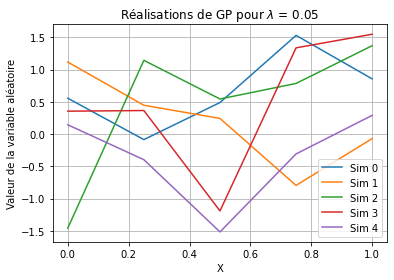

In [5]:
simulGP_gauss(X, N, lbda)

### Question 2)

In [6]:
#N = 10
#X = np.linspace(0, 1, N)
Z = np.sin(4 * np.pi * draw_uniform_in_intervals(N))

In [7]:
def neglikelihood(Z, lbda):
    sigma = sigmaKov(Z, lbda, kov)
    d = len(Z)
    Z = Z.reshape(1, d)
    #print(f"Z : {Z}")
    Zt = Z.T
    #print(f"Zt : {Zt}")
    a = d * np.log(2 * np.pi)
    #print(f"a = {a}")
    detsig = np.linalg.det(sigma)
    print(f"Déterminant de sigma : {detsig}")
    invsig = np.linalg.inv(sigma)
    b = 0.5 * np.log(detsig)
    #print(f"b = {b} : 0.5 * np.log(np.linalg.det(sigma)) with detsig = {detsig}")
    c = (0.5 * Z @ invsig @ Zt).flatten()[0]
    return a + b + c


neglikelihood(Z, lbda)

Déterminant de sigma : -8.209900649729606e-09


C:\Users\ARTHUR~1.VIE\AppData\Local\Temp/ipykernel_18704/438204880.py:13: RuntimeWarning: invalid value encountered in log
  b = 0.5 * np.log(detsig)


nan